In [1]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sys.path.append("../../../")

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from xgboost import XGBClassifier, XGBRFClassifier

from helpers.split import label_strings, tag_label_feature_split

/Users/rerobbins/opt/anaconda3/envs/tf/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
def cross_gradient_boost_experiment(dataset):

    # load data and separate one hot encoded labels from features,
    # transform one hot encoded labels into label strings,
    # then encode label strings

    df = pd.read_pickle(dataset)
    _, one_hot_labels, X = tag_label_feature_split(df)
    labels = label_strings(one_hot_labels)

    le = LabelEncoder()
    y = le.fit_transform(pd.Series.ravel(labels))

    # divide into train and test data sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=10, stratify=y
    )

    # standardize features
    sc = StandardScaler()
    X_train_std = sc.fit_transform(X_train)
    X_test_std = sc.transform(X_test)

    # calculate sample weights to deal with class imbalance

    sample_weights = compute_sample_weight(class_weight="balanced", y=y_train)

    model = XGBRFClassifier(use_label_encoder=False, objective="multi:softprob")

    model.fit(X_train_std, y_train, sample_weight=sample_weights)

    predictions = model.predict(X_test_std)
    train_accuracy = model.score(X_train_std, y_train)
    test_accuracy = model.score(X_test_std, y_test)

    class_names = le.inverse_transform(list(model.classes_))
    print(f"Train: {train_accuracy = :f}\n")
    print(
        classification_report(
            y_train, model.predict(X_train_std), digits=4, target_names=class_names
        )
    )
    print(f"Test: {test_accuracy = :f}\n")
    print(
        classification_report(y_test, predictions, digits=4, target_names=class_names)
    )

    # generate confusion matrix and
    # display nicely with seaborn
    cm = confusion_matrix(y_test, predictions, normalize="true")
    heatmap_labels = list(le.classes_)
    plt.figure(figsize=(9, 9))
    sns.heatmap(
        cm,
        annot=True,
        fmt=".3f",
        linewidths=0.5,
        square=True,
        cmap="Blues_r",
        xticklabels=class_names,
        yticklabels=class_names,
    )
    plt.ylabel("Actual label")
    plt.xlabel("Predicted label")
    name = os.path.basename(dataset).split(".")[0]
    plt.title(f"{name} test (row normalized)")

    return model

[11:15:39] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train: train_accuracy = 0.489110

                 precision    recall  f1-score   support

    genre_blues     0.1998    0.4465    0.2760       374
genre_classical     0.8172    0.8072    0.8122      4221
  genre_country     0.1977    0.6728    0.3056       327
    genre_disco     0.2216    0.6817    0.3345       289
   genre_hiphop     0.5241    0.3574    0.4250      1701
     genre_jazz     0.3114    0.5842    0.4063      1241
    genre_metal     0.3443    0.7895    0.4795       665
      genre_pop     0.6396    0.1827    0.2843      4274
   genre_reggae     0.2761    0.6434    0.3864       788
     genre_rock     0.6076    0.3803    0.4678      3200

       accuracy                         0.4891     17080
      macro avg     0.4139 

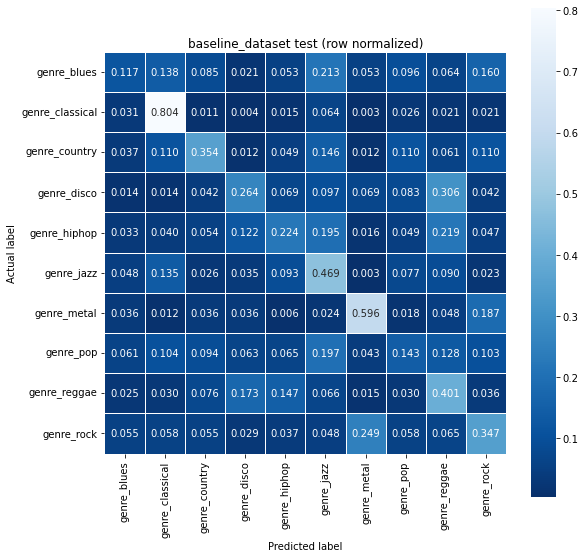

In [3]:
model_1 = cross_gradient_boost_experiment("../../../datasets/baseline_dataset.pickle")

[11:16:23] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train: train_accuracy = 0.617272

                 precision    recall  f1-score   support

    genre_blues     0.3517    0.7005    0.4683       374
genre_classical     0.8416    0.8408    0.8412      4221
  genre_country     0.4859    0.7370    0.5857       327
    genre_disco     0.2862    0.9100    0.4354       289
   genre_hiphop     0.5774    0.6120    0.5942      1701
     genre_jazz     0.4776    0.7123    0.5718      1241
    genre_metal     0.4469    0.8602    0.5882       665
      genre_pop     0.7218    0.3229    0.4462      4274
   genre_reggae     0.5030    0.8401    0.6293       788
     genre_rock     0.6647    0.5278    0.5884      3200

       accuracy                         0.6173     17080
      macro avg     0.5357 

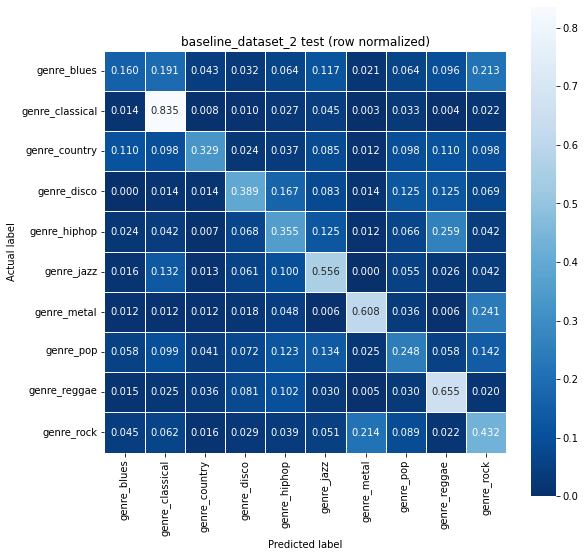

In [4]:
model_2 = cross_gradient_boost_experiment("../../../datasets/baseline_dataset_2.pickle")

[11:16:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train: train_accuracy = 0.483665

                 precision    recall  f1-score   support

    genre_blues     0.2242    0.2032    0.2132       374
genre_classical     0.8763    0.8271    0.8509      4221
  genre_country     0.1408    0.5810    0.2267       327
    genre_disco     0.2877    0.7266    0.4122       289
   genre_hiphop     0.4416    0.3310    0.3784      1701
     genre_jazz     0.3202    0.6293    0.4245      1241
    genre_metal     0.3214    0.8391    0.4648       665
      genre_pop     0.6364    0.1774    0.2774      4274
   genre_reggae     0.2625    0.7259    0.3856       788
     genre_rock     0.5716    0.3319    0.4199      3200

       accuracy                         0.4837     17080
      macro avg     0.4083 

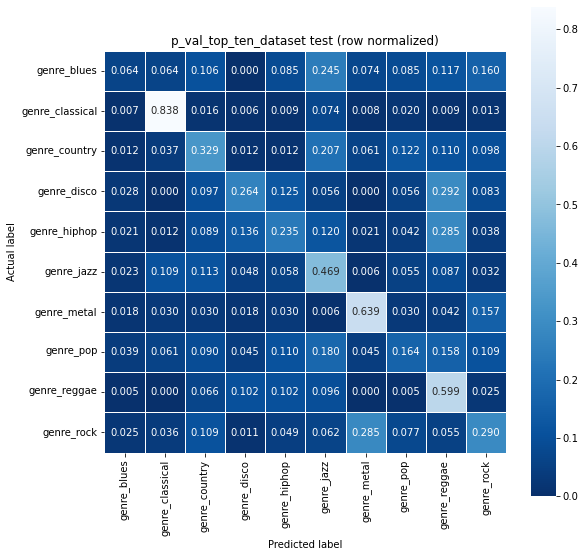

In [5]:
model_3 = cross_gradient_boost_experiment("../../../datasets/p_val_top_ten_dataset.pickle")

[11:16:58] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train: train_accuracy = 0.549473

                 precision    recall  f1-score   support

    genre_blues     0.2190    0.5000    0.3046       374
genre_classical     0.8856    0.8415    0.8630      4221
  genre_country     0.2863    0.6820    0.4033       327
    genre_disco     0.3668    0.7958    0.5022       289
   genre_hiphop     0.5566    0.4509    0.4982      1701
     genre_jazz     0.3652    0.6535    0.4685      1241
    genre_metal     0.3807    0.8617    0.5281       665
      genre_pop     0.6947    0.2188    0.3327      4274
   genre_reggae     0.3167    0.8058    0.4547       788
     genre_rock     0.6253    0.4600    0.5301      3200

       accuracy                         0.5495     17080
      macro avg     0.4697 

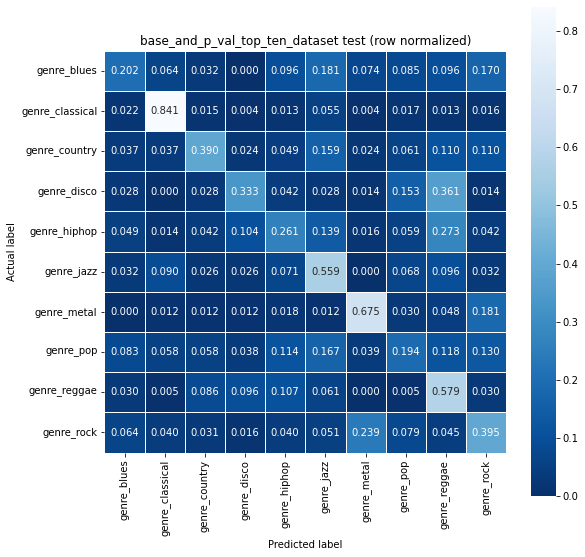

In [6]:
model_4 = cross_gradient_boost_experiment("../../../datasets/base_and_p_val_top_ten_dataset.pickle")

[11:17:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train: train_accuracy = 0.624297

                 precision    recall  f1-score   support

    genre_blues     0.3144    0.7112    0.4361       374
genre_classical     0.8980    0.8451    0.8707      4221
  genre_country     0.4652    0.7156    0.5639       327
    genre_disco     0.3391    0.8858    0.4904       289
   genre_hiphop     0.5731    0.6520    0.6100      1701
     genre_jazz     0.4506    0.7575    0.5651      1241
    genre_metal     0.4317    0.8977    0.5830       665
      genre_pop     0.7557    0.3077    0.4373      4274
   genre_reggae     0.4956    0.8528    0.6269       788
     genre_rock     0.6817    0.5334    0.5985      3200

       accuracy                         0.6243     17080
      macro avg     0.5405 

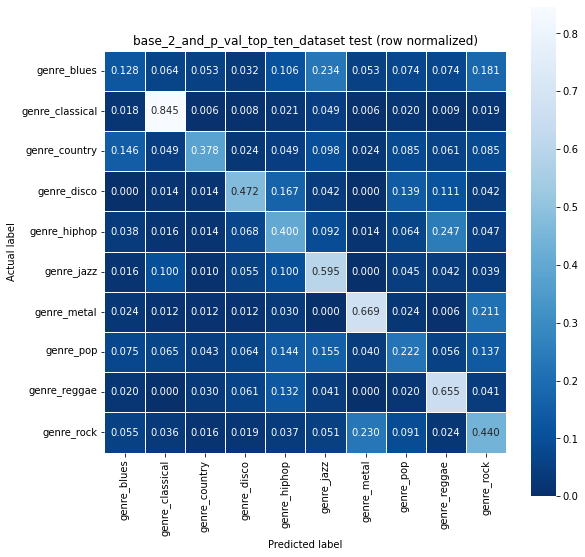

In [7]:
model_5 = cross_gradient_boost_experiment("../../../datasets/base_2_and_p_val_top_ten_dataset.pickle")